<a href="https://colab.research.google.com/github/Aloncohen41/Esports-Project/blob/main/Esports_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esports Best Games Data Analysis Project

## Introduction

This project aims to explore a dataset containing information about the best-selling esports games. We will perform exploratory data analysis (EDA) to understand trends, patterns, and key factors influencing game sales across different regions and platforms. Additionally, we will formulate questions that can be answered using the available data and explore the potential for building a predictive model.

## Data Description

The dataset includes the following columns:

*   **Rank**: Ranking of overall sales
*   **Name**: The game's name
*   **Platform**: Platform of the game's release (i.e., PC, PS4, etc.)
*   **Year**: Year of the game's release
*   **Genre**: Genre of the game
*   **Publisher**: Publisher of the game
*   **NA_Sales**: Sales in North America (in millions)
*   **EU_Sales**: Sales in Europe (in millions)
*   **JP_Sales**: Sales in Japan (in millions)
*   **Other_Sales**: Sales in the rest of the world (in millions)
*   **Global_Sales**: Total worldwide sales.

## Project Questions

Here are some questions we will explore throughout this project:

1.  What are the top-selling game genres in each region (North America, Europe, Japan, and the rest of the world)? Do regional preferences for genres differ significantly?
2.  Which platforms have the highest total sales in each region? Are there specific platforms that are particularly successful in certain regions, potentially indicating a better fit for that market?
3.  Are there relationships between publishers and sales performance for specific genres or platforms? Do certain publishers perform better with particular game types or on certain consoles?
4.  Are there any relationships between publisher and sales performance in different regions? Do certain publishers perform better in specific markets?
5.  How have total global game sales changed over the years, and what does this indicate about the growth of the gaming industry?
6.  Can we predict the global sales of a game based on its platform, genre, and regional sales?
7.  Which features are the most important in predicting game sales?

In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
file_path = '/content/drive/My Drive/Data Science Studies/Esports Project/vgsales.csv'

# Read the CSV into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    # Display the first few rows
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
# Display the column names and their data types
display(df.info())

# Display the number of missing values in each column
display(df.isnull().sum())

# Display descriptive statistics for numerical columns
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


None

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.0,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.0,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.0,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.0,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.0,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.0,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
# Convert 'Year' to integer type, handling missing values.
# We'll use pandas' Int64 dtype which allows for NaN.
df['Year'] = df['Year'].astype('Int64')

# Fill missing 'Publisher' values with 'Unknown Publisher' using the recommended non-inplace method
df['Publisher'] = df['Publisher'].fillna('Unknown Publisher')

# Display the first few rows to see the changes
display(df.head())

# Display info to confirm data types, index, and check for missing values
display(df.info())
display(df.isnull().sum())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


None

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Data Cleaning

Based on the initial data exploration, we performed the following cleaning steps:

1.  **Set 'Rank' as Index**: The 'Rank' column represents the overall sales ranking and serves as a unique identifier for each game. We set it as the DataFrame's index for easier data access and alignment.
2.  **Convert 'Year' to Integer**: The 'Year' column contained floating-point numbers and missing values. Since a year is a whole number, we converted the column to a nullable integer type (`Int64`) to accommodate the missing values while ensuring the correct data type for analysis.
3.  **Handle Missing Publisher Values**: We filled the missing values in the 'Publisher' column with 'Unknown Publisher' to ensure all games have a publisher listed, even if it's a placeholder.

## Question 1: Top-Selling Game Genres by Region

To answer this question, we will analyze the sales data to identify which game genres have the highest total sales in North America, Europe, Japan, and other regions. This will help us understand if there are significant differences in genre preferences across these regions.

Genre Ranks by Region (based on Average Sales), sorted by Global Sales Rank (Ascending):


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Platform,1,2,2,3,1
Shooter,2,1,12,1,2
Role-Playing,8,7,1,8,3
Racing,4,3,10,2,4
Sports,3,4,8,4,5
Fighting,6,9,3,7,6
Action,5,5,9,5,7
Misc,7,8,7,6,8
Simulation,10,6,5,9,9


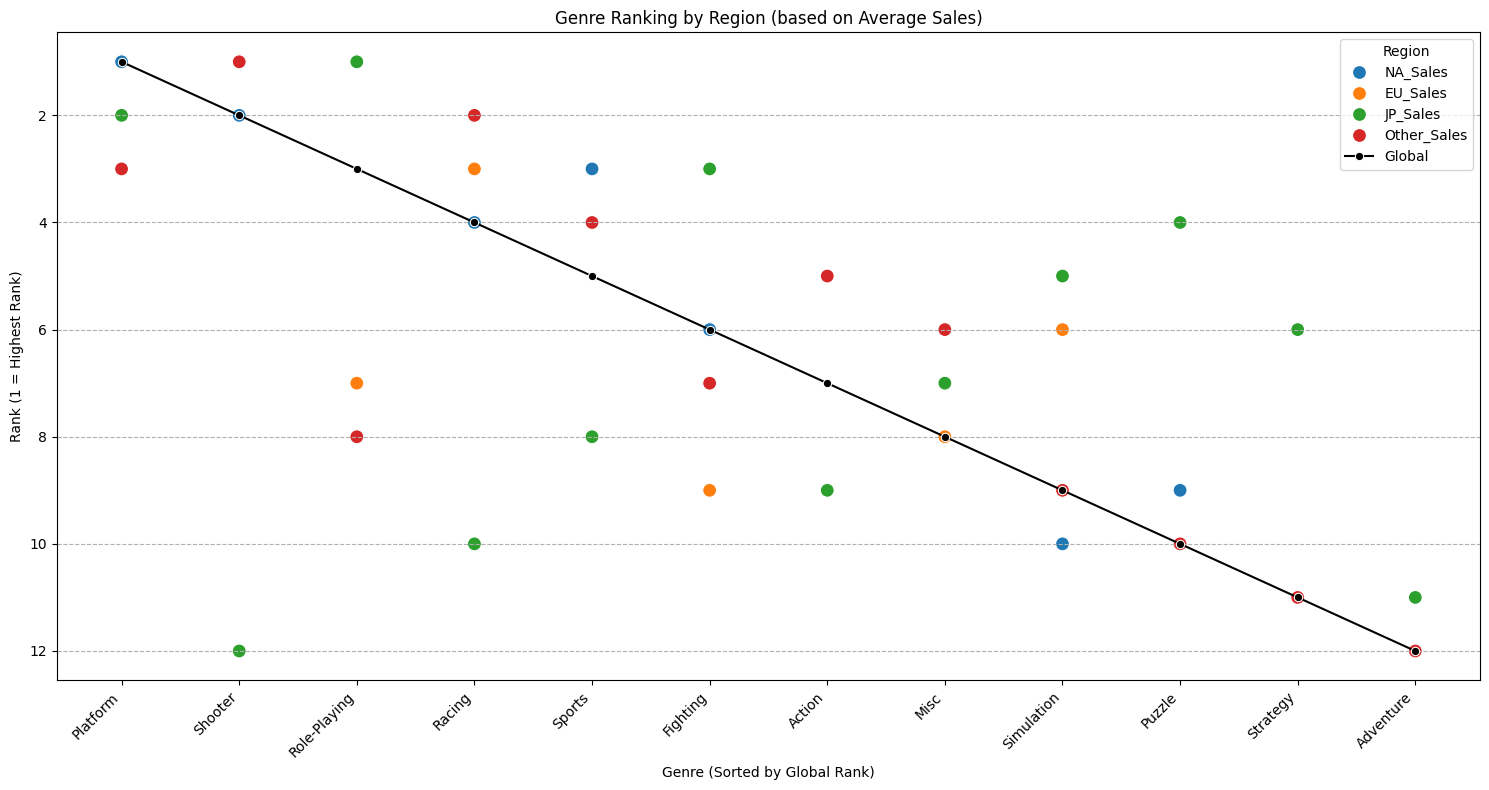

In [30]:
# Calculate average sales per genre for each region, including Global Sales
genre_average_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Calculate the rank of each genre within each region based on average sales
# Rank from highest to lowest, so ascending=False
genre_ranks = genre_average_sales.rank(method='min', ascending=False)

# Convert ranks to integers
genre_ranks = genre_ranks.astype(int)

# Sort the genre ranks table by Global_Sales in ascending order
genre_ranks_sorted = genre_ranks.sort_values(by='Global_Sales', ascending=True)

# Display the sorted table of genre ranks by region
print("Genre Ranks by Region (based on Average Sales), sorted by Global Sales Rank (Ascending):")
display(genre_ranks_sorted)

# Prepare data for plotting: melt the ranked data
genre_ranks_melted = genre_ranks_sorted.reset_index().melt(id_vars='Genre',
                                                            value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                                            var_name='Region',
                                                            value_name='Rank')

# Prepare data for global rank line:
global_ranks_plot = genre_ranks_sorted.reset_index()[['Genre', 'Global_Sales']].rename(columns={'Global_Sales': 'Rank'})
global_ranks_plot['Region'] = 'Global' # Add a 'Region' column for consistency if needed, though not strictly required for this plot

# Create the plot showing genre ranks by region (scatter for regions, line for global)
plt.figure(figsize=(15, 8))

# Plot regional ranks as scatter points
sns.scatterplot(data=genre_ranks_melted, x='Genre', y='Rank', hue='Region', s=100) # Increased marker size

# Plot global ranks as a line
sns.lineplot(data=global_ranks_plot, x='Genre', y='Rank', color='black', marker='o', label='Global') # Added marker and label

# Invert the y-axis so that rank 1 is at the top
plt.gca().invert_yaxis()

plt.title('Genre Ranking by Region (based on Average Sales)')
plt.xlabel('Genre (Sorted by Global Rank)')
plt.ylabel('Rank (1 = Highest Rank)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Region') # Add a legend
plt.tight_layout()
plt.show()

### Analysis of Genre Ranking by Region

The analysis of genre rankings by region, based on average sales, reveals interesting insights into regional preferences:

* **Overall Similarity:** For most game genres, the rankings in North America, Europe, and 'Other' regions are quite similar, suggesting a shared taste in game genres across these markets.
* **Japanese Market Divergence:** The Japanese market consistently shows a different pattern of genre preferences compared to the other regions and the global ranking. Genres like Role-Playing and Puzzle games rank significantly higher in Japan than elsewhere, while Shooter and Racing games are less popular.
* **Global Rank as a Benchmark:** The global rank, based on average sales across all regions, provides a benchmark against which to compare regional preferences. The closer a region's rank is to the global rank, the more aligned its preferences are with the worldwide average.


Total Absolute Deviation in Genre Rank from Global Rank:


,0
JP_Sales,44
EU_Sales,16
Other_Sales,16
NA_Sales,12


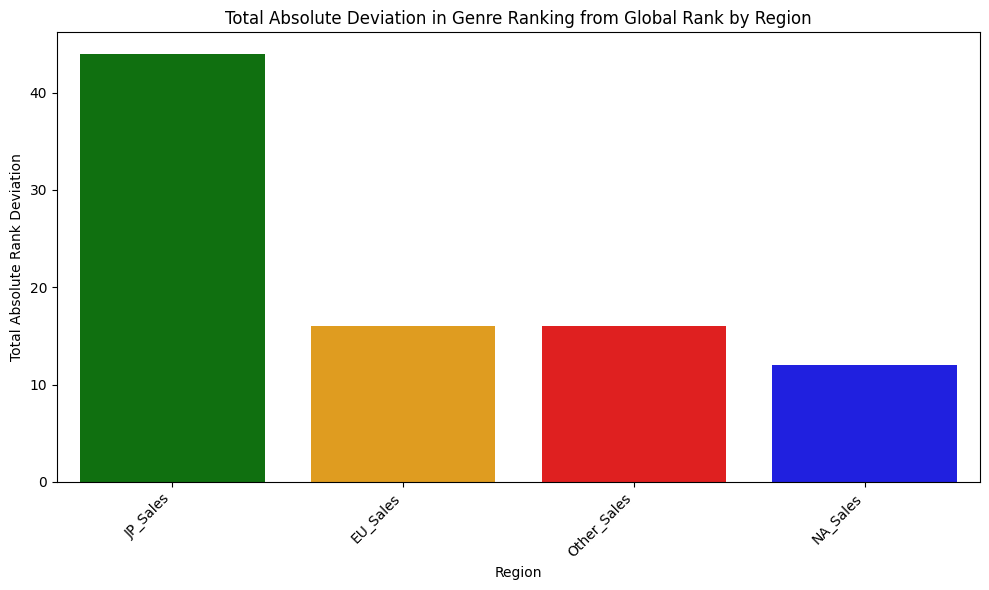

In [32]:
# Recalculate genre_average_sales and genre_ranks if not already done
if 'genre_average_sales' not in locals():
    genre_average_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

if 'genre_ranks' not in locals():
    genre_ranks = genre_average_sales.rank(method='min', ascending=False)
    genre_ranks = genre_ranks.astype(int)

# Sort the genre ranks table by Global_Sales in ascending order
genre_ranks_sorted = genre_ranks.sort_values(by='Global_Sales', ascending=True)

# Calculate the absolute difference in rank for each region from the global rank
genre_rank_absolute_differences = genre_ranks_sorted[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sub(genre_ranks_sorted['Global_Sales'], axis=0).abs()

# Calculate the sum of absolute differences for each region
total_absolute_deviation = genre_rank_absolute_differences.sum().sort_values(ascending=False)

# Display the total absolute deviation for each region
print("\nTotal Absolute Deviation in Genre Rank from Global Rank:")
display(total_absolute_deviation)

# Prepare data for plotting: create a DataFrame from the total_absolute_deviation series
total_absolute_deviation_df = total_absolute_deviation.reset_index()
total_absolute_deviation_df.columns = ['Region', 'Total Absolute Rank Deviation']

# Define the order of regions for the plot, with JP_Sales first
region_plot_order = ['JP_Sales', 'EU_Sales', 'Other_Sales', 'NA_Sales']

# Define the custom color palette for each region
region_palette = {'NA_Sales': 'blue', 'EU_Sales': 'orange', 'JP_Sales': 'green', 'Other_Sales': 'red'}

# Create a bar plot for total absolute deviation with regional coloring and specified order
plt.figure(figsize=(10, 6))
sns.barplot(data=total_absolute_deviation_df, x='Region', y='Total Absolute Rank Deviation', hue='Region', order=region_plot_order, hue_order=region_plot_order, palette=region_palette)

plt.title('Total Absolute Deviation in Genre Ranking from Global Rank by Region')
plt.xlabel('Region')
plt.ylabel('Total Absolute Rank Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Answer to Question 1: Top-Selling Game Genres by Region

Based on the analysis of average sales per genre across different regions, we can conclude the following regarding regional preferences:

*   **Overall Trend Similarity (NA, EU, Other):** The North American, European, and 'Other' regions show a strong similarity in their top-selling game genres. Genres like Platform, Shooter, and Racing consistently rank high in these markets, indicating a shared taste and potentially similar market dynamics. The low total absolute deviation from the global rank for these regions further supports this observation.

*   **Japanese Market Divergence:** The Japanese market stands out with significantly different genre preferences compared to North America, Europe, and the rest of the world. Role-Playing games and Puzzle games rank considerably higher in Japan than in other regions, while genres like Shooter and Racing are less popular. The high total absolute deviation of Japan's genre rankings from the global rank clearly highlights this unique market preference.

*   **Global Rank as a Reference:** The global rank provides a useful benchmark. Regions with a lower total absolute deviation from the global rank (like North America) have genre preferences that are more aligned with the worldwide average, while regions with a higher deviation (like Japan) have more distinct preferences.

In summary, while North American, European, and 'Other' markets exhibit similar genre preferences, the Japanese market shows a notable divergence, with a stronger inclination towards Role-Playing and Puzzle games.

## Question 2: Top-Selling Platforms by Region

To answer this question, we will analyze the sales data to identify which platforms have the highest total sales in North America, Europe, Japan, and other regions. This will help us understand if there are specific platforms that are particularly successful in certain regions, potentially indicating a better fit for that market.

Platform Ranks by Region (based on Average Sales), sorted by Global Sales Rank (Ascending):


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
GB,2,1,2,4,1
NES,1,5,1,8,2
GEN,3,7,11,12,3
SNES,14,17,3,18,4
PS4,10,2,22,1,5
X360,5,4,27,5,6
2600,4,22,31,23,7
PS3,9,3,18,2,8
Wii,8,8,20,6,9


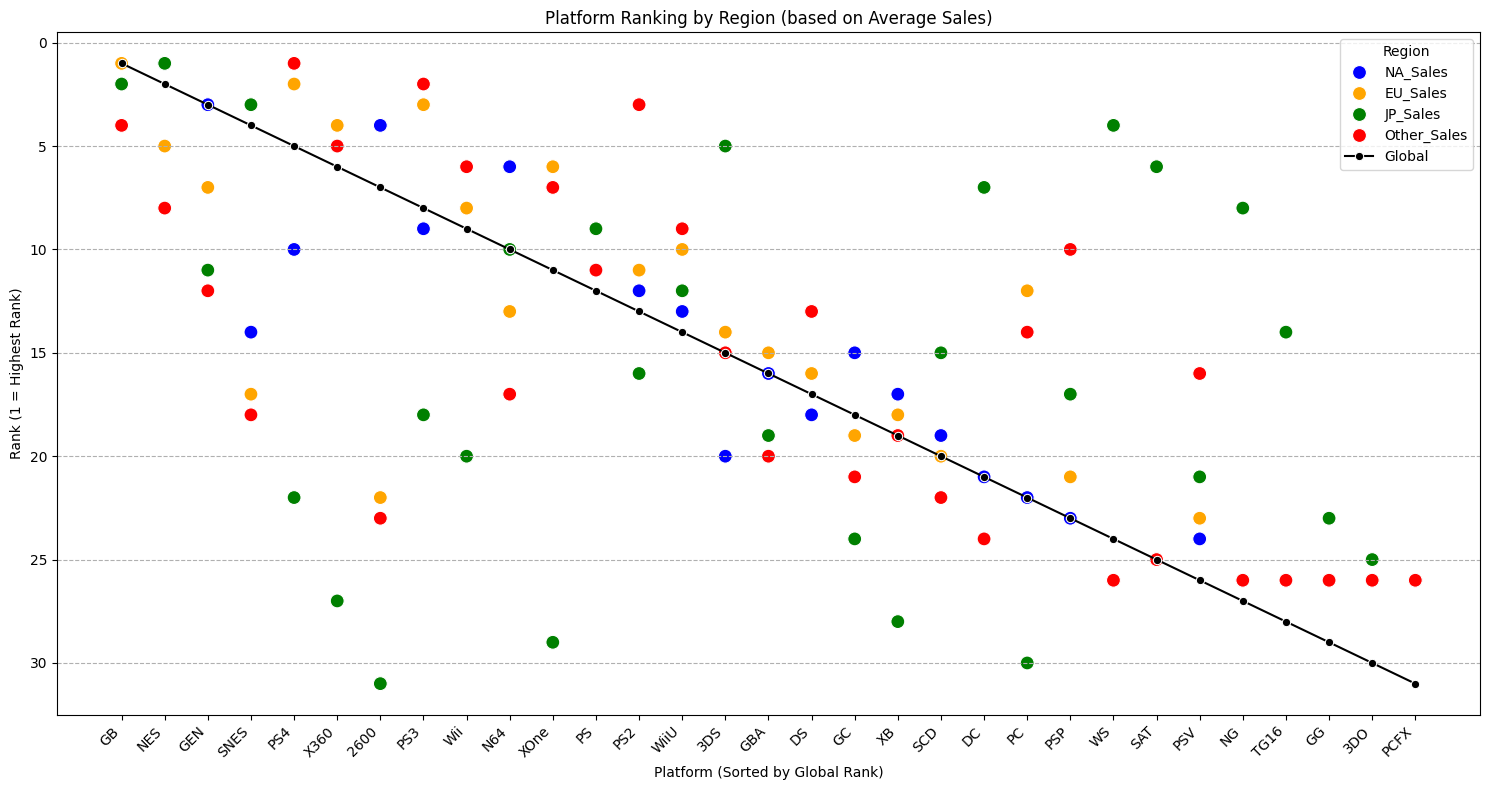

In [33]:
# Calculate average sales per platform for each region, including Global Sales
platform_average_sales = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Calculate the rank of each platform within each region based on average sales
# Rank from highest to lowest, so ascending=False
platform_ranks = platform_average_sales.rank(method='min', ascending=False)

# Convert ranks to integers
platform_ranks = platform_ranks.astype(int)

# Sort the platform ranks table by Global_Sales in ascending order for consistent plotting
platform_ranks_sorted = platform_ranks.sort_values(by='Global_Sales', ascending=True)

# Display the sorted table of platform ranks by region based on average sales
print("Platform Ranks by Region (based on Average Sales), sorted by Global Sales Rank (Ascending):")
display(platform_ranks_sorted)

# Prepare data for plotting: melt the ranked data
platform_ranks_melted = platform_ranks_sorted.reset_index().melt(id_vars='Platform',
                                                            value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                                            var_name='Region',
                                                            value_name='Rank')

# Prepare data for global rank line:
global_platform_ranks_plot = platform_ranks_sorted.reset_index()[['Platform', 'Global_Sales']].rename(columns={'Global_Sales': 'Rank'})
global_platform_ranks_plot['Region'] = 'Global' # Add a 'Region' column for consistency

# Define the custom color palette for each region, matching the previous plots
region_palette = {'NA_Sales': 'blue', 'EU_Sales': 'orange', 'JP_Sales': 'green', 'Other_Sales': 'red', 'Global': 'black'}

# Create the plot showing platform ranks by region (scatter for regions, line for global)
plt.figure(figsize=(15, 8))

# Plot regional ranks as scatter points, using the defined palette
sns.scatterplot(data=platform_ranks_melted, x='Platform', y='Rank', hue='Region', s=100, palette=region_palette) # Increased marker size and added palette

# Plot global ranks as a line, using the defined palette for the Global line
sns.lineplot(data=global_platform_ranks_plot, x='Platform', y='Rank', color='black', marker='o', label='Global') # Added marker and label

# Invert the y-axis so that rank 1 is at the top
plt.gca().invert_yaxis()

plt.title('Platform Ranking by Region (based on Average Sales)')
plt.xlabel('Platform (Sorted by Global Rank)')
plt.ylabel('Rank (1 = Highest Rank)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Region') # Add a legend
plt.tight_layout()
plt.show()

### Analysis of Platform Ranking by Region (based on Average Sales)

Similar to the genre analysis, the platform rankings based on average sales per game reveal distinct regional preferences. The Japanese market, once again, shows a notable divergence from the North American, European, and 'Other' regions, as well as from the global ranking. This suggests that Japanese gamers tend to favor different platforms compared to players in other parts of the world, even when considering the average performance of games on those platforms.

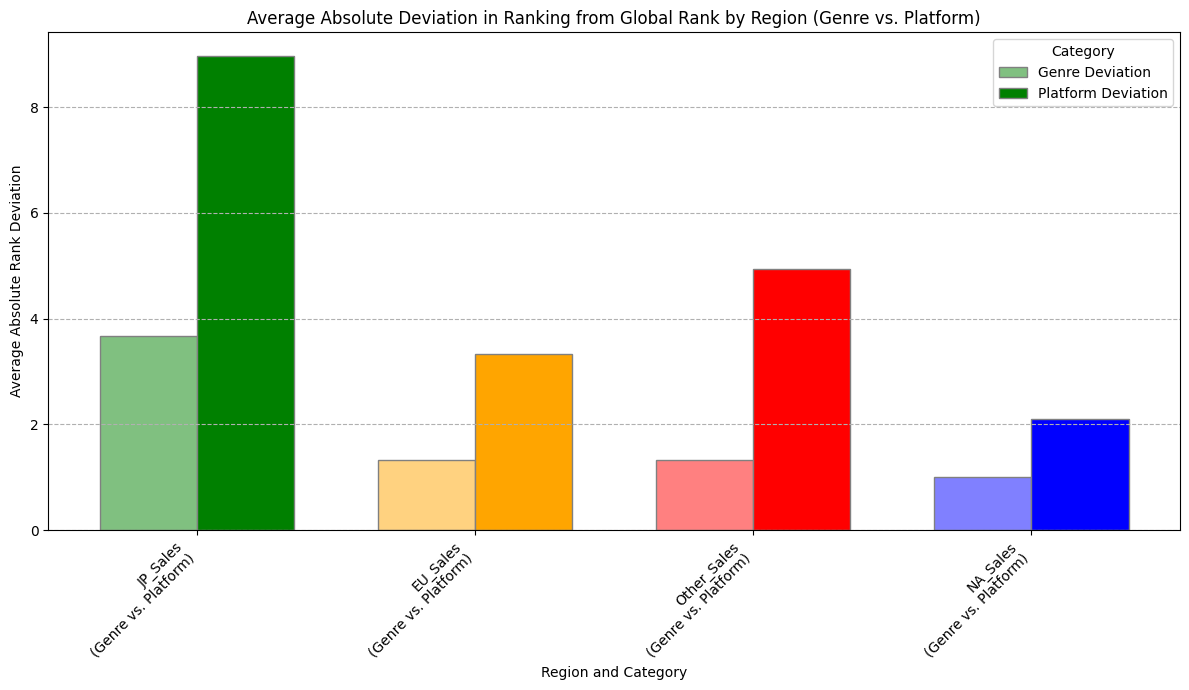

In [34]:
# Ignore FutureWarnings from seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Ensure necessary variables are calculated
# Recalculate genre_average_sales and genre_ranks if not already done
if 'genre_average_sales' not in locals():
    genre_average_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

if 'genre_ranks' not in locals():
    genre_ranks = genre_average_sales.rank(method='min', ascending=False)
    genre_ranks = genre_ranks.astype(int)

# Ensure genre_ranks_sorted is calculated
if 'genre_ranks_sorted' not in locals():
    genre_ranks_sorted = genre_ranks.sort_values(by='Global_Sales', ascending=True)

# Calculate total_absolute_deviation if not already done
if 'total_absolute_deviation' not in locals():
    genre_rank_absolute_differences = genre_ranks_sorted[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sub(genre_ranks_sorted['Global_Sales'], axis=0).abs()
    total_absolute_deviation = genre_rank_absolute_differences.sum().sort_values(ascending=False)


# Recalculate platform_average_sales and platform_ranks if not already done
if 'platform_average_sales' not in locals():
    platform_average_sales = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

if 'platform_ranks' not in locals():
    platform_ranks = platform_average_sales.rank(method='min', ascending=False)
    platform_ranks = platform_ranks.astype(int)

# Ensure platform_ranks_sorted is calculated
if 'platform_ranks_sorted' not in locals():
    platform_ranks_sorted = platform_ranks.sort_values(by='Global_Sales', ascending=True)

# Calculate total_absolute_deviation_platforms if not already done
if 'total_absolute_deviation_platforms' not in locals():
    platform_rank_absolute_differences = platform_ranks_sorted[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sub(platform_ranks_sorted['Global_Sales'], axis=0).abs()
    total_absolute_deviation_platforms = platform_rank_absolute_differences.sum().sort_values(ascending=False)


# Get the number of genres and platforms for calculating average deviation
num_genres = len(genre_ranks_sorted)
num_platforms = len(platform_ranks_sorted)


# Calculate average absolute deviation
average_absolute_deviation_genres = total_absolute_deviation / num_genres
average_absolute_deviation_platforms = total_absolute_deviation_platforms / num_platforms


# Combine the two series into a single DataFrame for plotting
total_deviation_comparison_df = pd.DataFrame({
    'Genre Deviation': average_absolute_deviation_genres,
    'Platform Deviation': average_absolute_deviation_platforms
}).reset_index()

total_deviation_comparison_df.columns = ['Region', 'Genre Deviation', 'Platform Deviation']

# Melt the DataFrame for easier plotting
total_deviation_comparison_melted = total_deviation_comparison_df.melt(id_vars='Region',
                                                                     value_vars=['Genre Deviation', 'Platform Deviation'],
                                                                     var_name='Category',
                                                                     value_name='Average Absolute Rank Deviation')


# Define the custom color palette for each region (base colors)
region_base_palette = {'NA_Sales': 'blue', 'EU_Sales': 'orange', 'JP_Sales': 'green', 'Other_Sales': 'red'}

# Custom function to lighten a color
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by mixing it with white.
    Amount should be between 0 and 1, where 0 is the original color
    and 1 is white.
    """
    try:
        c = mc.to_rgb(color)
    except ValueError:
        return color # Return original color if invalid

    white = (1, 1, 1)
    # Linear interpolation between the color and white
    lighter_c = [(1 - amount) * c_i + amount * white_i for c_i, white_i in zip(c, white)]
    return lighter_c # Returns RGB tuple


# Define the order of regions for the x-axis, with JP_Sales first
region_plot_order = ['JP_Sales', 'EU_Sales', 'Other_Sales', 'NA_Sales']
category_order = ['Genre Deviation', 'Platform Deviation']

# Prepare data for plotting with matplotlib
bar_width = 0.35
r = range(len(region_plot_order))

genre_bars = [total_deviation_comparison_df[total_deviation_comparison_df['Region'] == region]['Genre Deviation'].iloc[0] for region in region_plot_order]
platform_bars = [total_deviation_comparison_df[total_deviation_comparison_df['Region'] == region]['Platform Deviation'].iloc[0] for region in region_plot_order]

genre_colors = [lighten_color(region_base_palette[region], 0.5) for region in region_plot_order]
platform_colors = [region_base_palette[region] for region in region_plot_order]

# Create the grouped bar plot using matplotlib
plt.figure(figsize=(12, 7))

plt.bar([x - bar_width/2 for x in r], genre_bars, color=genre_colors, width=bar_width, edgecolor='grey', label='Genre Deviation')
plt.bar([x + bar_width/2 for x in r], platform_bars, color=platform_colors, width=bar_width, edgecolor='grey', label='Platform Deviation')

# Add xticks on the middle of the grouped bars
plt.xlabel('Region and Category') # Changed x-axis label
plt.ylabel('Average Absolute Rank Deviation')
plt.xticks([x for x in r], [f'{region}\n(Genre vs. Platform)' for region in region_plot_order], rotation=45, ha='right') # Modified x-tick labels


plt.title('Average Absolute Deviation in Ranking from Global Rank by Region (Genre vs. Platform)')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Analysis 2: Top-Selling Platforms by Region

Based on the analysis of average sales per platform across different regions and the comparison of average absolute deviations in ranking, we can draw the following conclusions regarding regional platform preferences:

*   **Japanese Market Divergence:** Consistent with the genre analysis, the Japanese market shows a significant divergence in platform preferences compared to North America, Europe, and the 'Other' regions. Certain platforms rank much higher in Japan based on average sales per game, while others that are popular globally or in other regions have lower rankings in Japan. The high average absolute deviation in platform ranking for Japan from the global rank, as shown in the comparison plot, further emphasizes this unique market.

*   **Similar Trends in NA, EU, and Other Regions (Platform):** While there are some differences, the platform preferences in North America, Europe, and the 'Other' regions show more alignment with each other and the global ranking compared to Japan. The lower average absolute deviations in platform ranking for these regions support this observation.

*   **Genre vs. Platform Deviation Comparison:** The grouped bar plot of average absolute deviations highlights that the Japanese market exhibits a considerably higher average absolute deviation in **platform** ranking compared to **genre** ranking when compared to the global ranks. This suggests that while Japan's genre preferences are distinct, their platform preferences, in terms of how they deviate from the global average, are even more unique.

*   **Potential Link between Platform and Genre Preferences in Japan:** The significant divergence in both genre and platform preferences in Japan raises an interesting question about the potential relationship between these two factors. It is plausible that the dominance or popularity of certain platforms in Japan could influence the popularity of specific game genres on those platforms. If a particular platform is highly favored, it might lead to a larger library of games in certain genres being developed and released on that platform, potentially reinforcing the market's preference for those genres. Conversely, a strong preference for certain genres might drive the success of platforms that offer a wide selection of high-quality games in those genres. This creates a complex interplay where platform and genre preferences could mutually influence each other, contributing to the unique gaming landscape in Japan.

In summary, the Japanese market demonstrates distinct preferences for both game platforms and genres, with platform preferences showing an even greater deviation from the global average than genre preferences. This suggests a potential interplay between platform availability and genre popularity in shaping the Japanese gaming market.

## Question 3: Publisher Performance within Genres vs. Global Genre Ranking

To answer this question, we will analyze the relationship between publishers and their sales performance within specific game genres, comparing their ranking within a genre to the genre's overall global average sales. This will help us identify publishers who consistently perform above or below the average for a given genre.

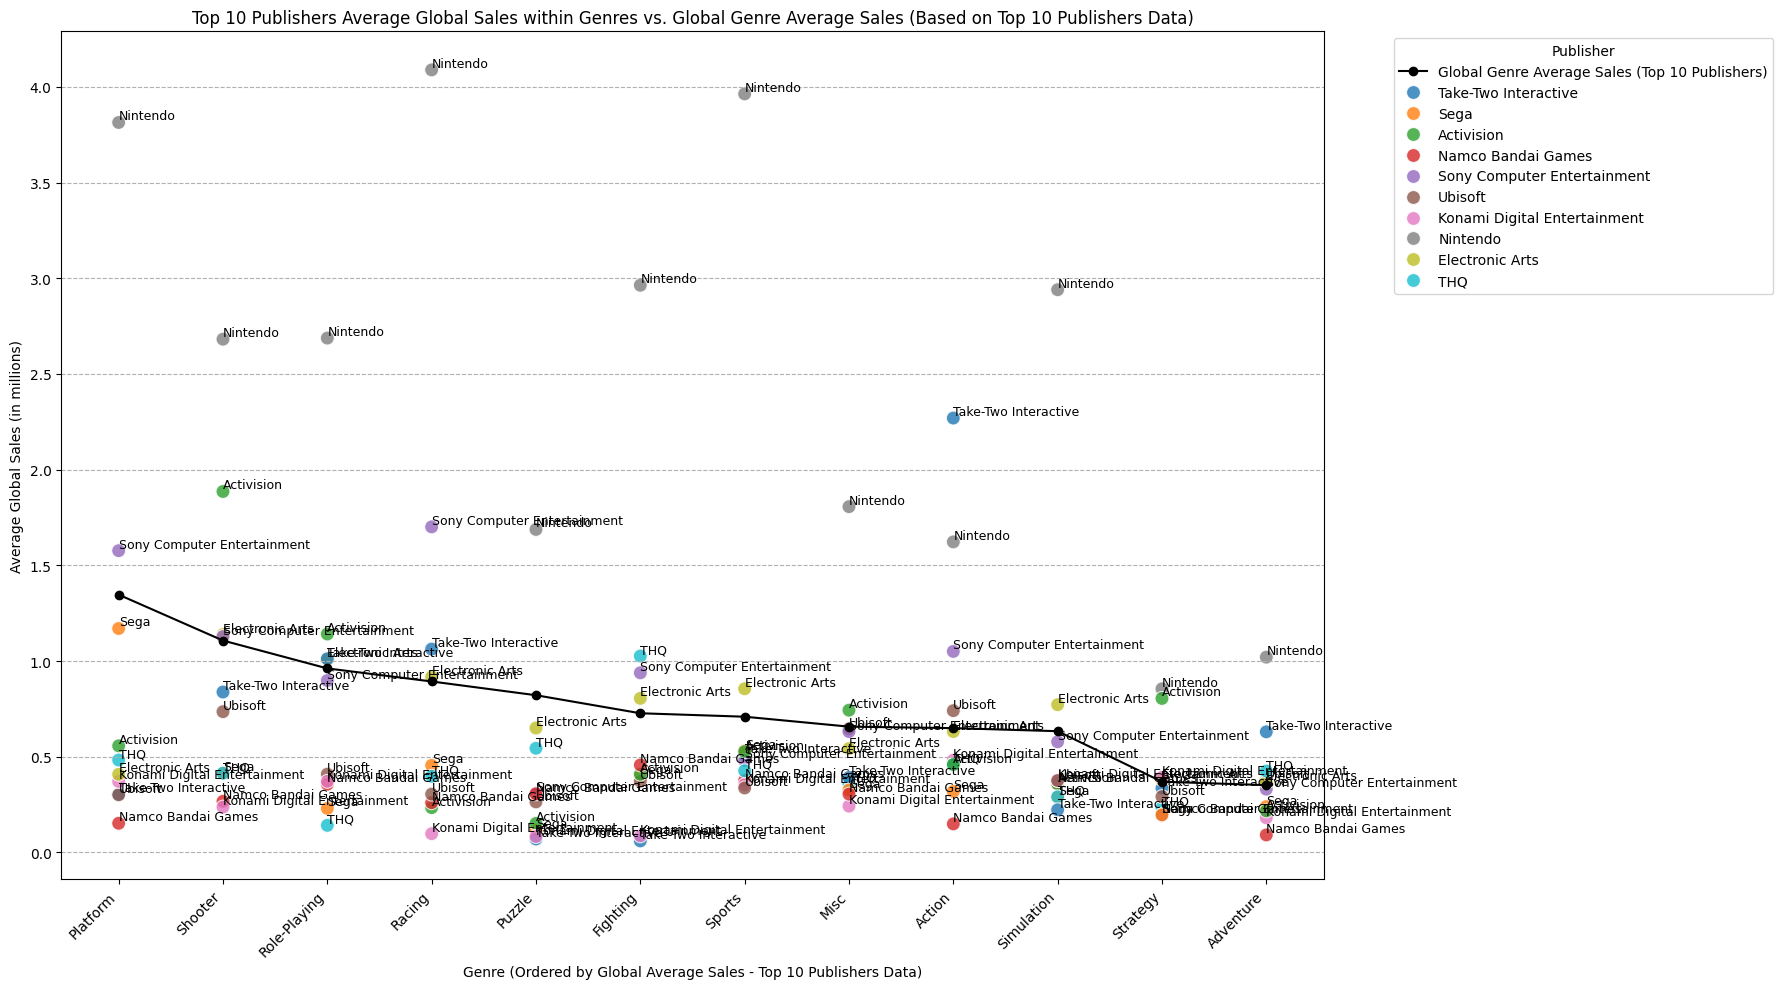



Analyzing Top 10 Publishers Average Global Sales on Platforms vs. Global Platform Average Sales (Based on Top 10 Publishers Data)


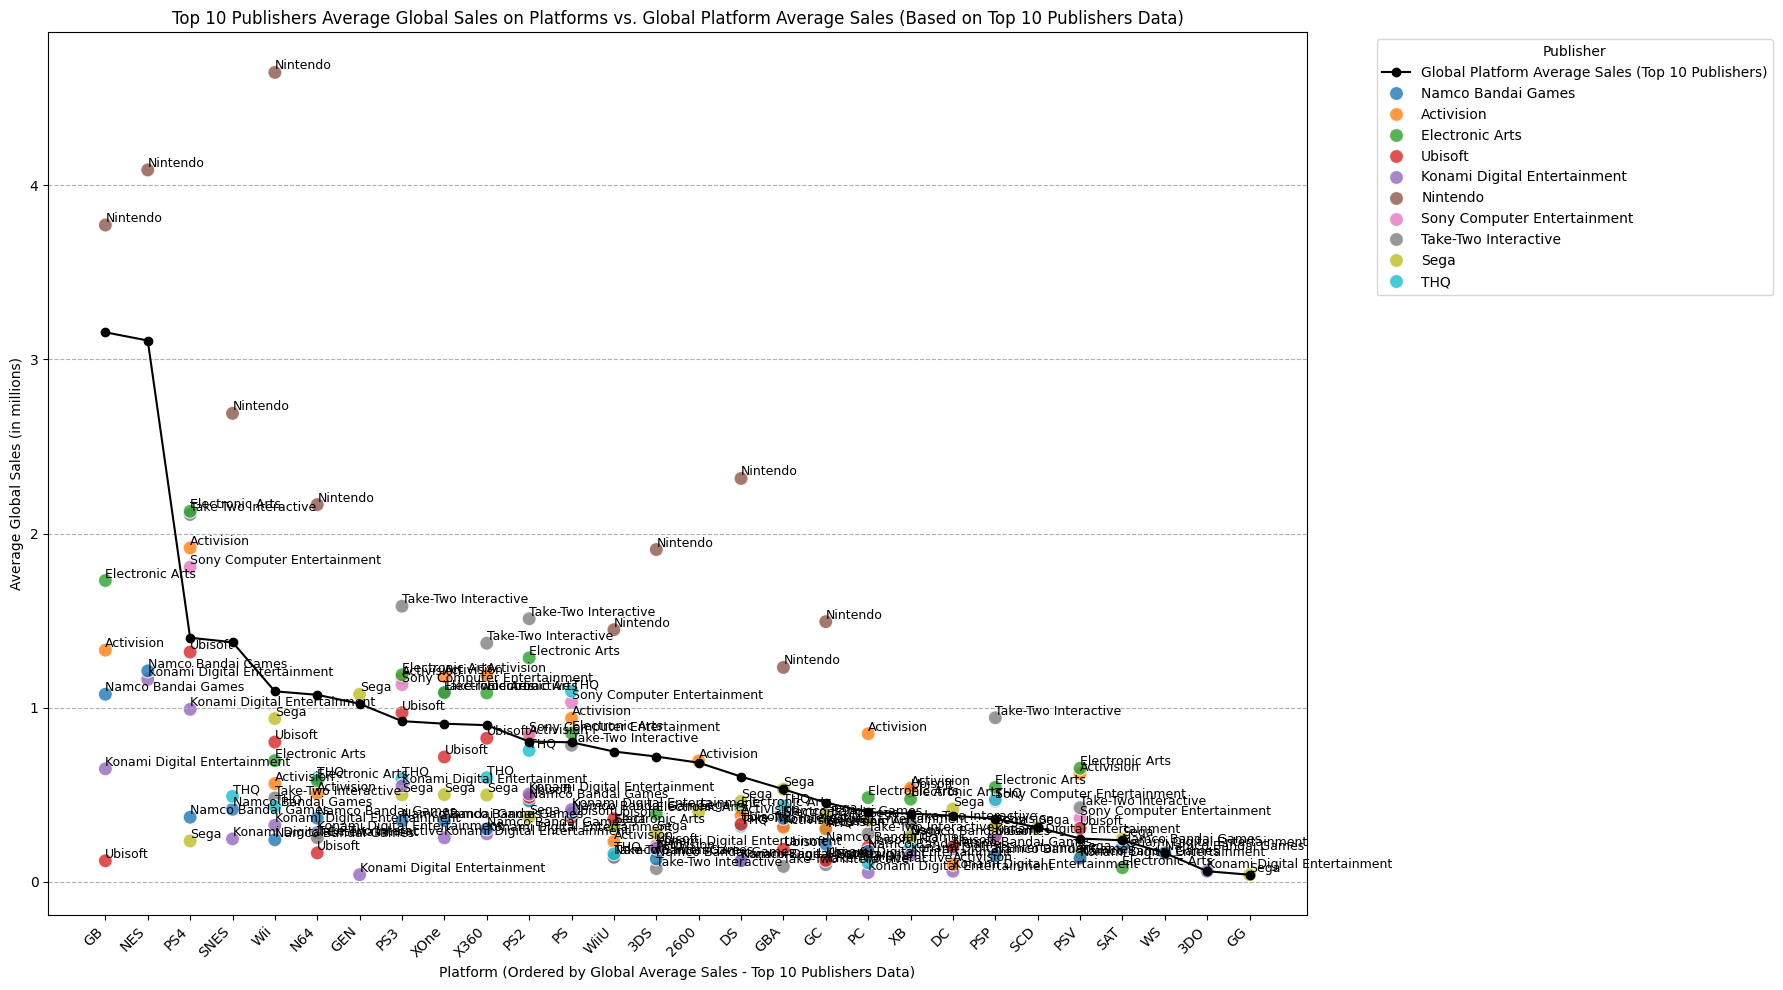

In [35]:
# Suppress DeprecationWarning from pandas apply
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas")

# --- Genre Analysis and Plot ---

# 1. Identify Top 10 Publishers by Total Global Sales (from all data)
publisher_total_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
top_10_publishers = publisher_total_sales.head(10).index.tolist()

# 2. Filter the original DataFrame to include only games from the Top 10 Publishers
df_top_publishers = df[df['Publisher'].isin(top_10_publishers)].copy()


# 3. Calculate Global Genre Average Sales per game (based ONLY on Top 10 Publishers data)
# Calculate the number of games per genre for top publishers
genre_game_counts_top_publishers = df_top_publishers.groupby('Genre').size().reset_index(name='Game_Count')
# Calculate total global sales per genre for top publishers
global_genre_total_sales_top_publishers = df_top_publishers.groupby('Genre')['Global_Sales'].sum().reset_index(name='Total_Global_Sales')
# Merge to calculate average global sales per genre for top publishers
global_genre_sales_avg_top_publishers = pd.merge(global_genre_total_sales_top_publishers, genre_game_counts_top_publishers, on='Genre', how='left')
global_genre_sales_avg_top_publishers['Average_Global_Sales'] = global_genre_sales_avg_top_publishers['Total_Global_Sales'] / global_genre_sales_avg_top_publishers['Game_Count']

# Order genres by their average global sales (descending) based ONLY on Top 10 Publishers data for plotting
global_genre_sales_avg_top_publishers_sorted = global_genre_sales_avg_top_publishers.sort_values(by='Average_Global_Sales', ascending=False)
genre_order_top_publishers = global_genre_sales_avg_top_publishers_sorted['Genre'].tolist()


# 4. Calculate Publisher Performance within Genres (Average Global Sales per game from publisher in genre - ONLY for Top 10 Publishers)
# This is already calculated in step 2 & 5 of previous attempts, but let's re-ensure
publisher_genre_performance = df_top_publishers.groupby(['Publisher', 'Genre']).agg(
    Total_Global_Sales=('Global_Sales', 'sum'),
    Game_Count=('Name', 'count') # Count games
).reset_index()

# Calculate average global sales per game for publisher in genre
publisher_genre_performance['Average_Global_Sales'] = publisher_genre_performance['Total_Global_Sales'] / publisher_genre_performance['Game_Count']


# 5. Combine Top 10 Publishers' Average Sales within Genres with the Top 10 Publishers' Global Genre Average Sales
# Merge publisher performance (avg sales for top publishers) with global genre average sales calculated from top publishers
publisher_genre_sales_comparison = pd.merge(publisher_genre_performance,
                                            global_genre_sales_avg_top_publishers[['Genre', 'Average_Global_Sales']].rename(columns={'Average_Global_Sales': 'Global_Genre_Average_Sales_Top_Publishers'}),
                                            on='Genre',
                                            how='left')

# Sort the comparison data by the genre order derived from top publishers' average sales
publisher_genre_sales_comparison['Genre_Order'] = pd.Categorical(publisher_genre_sales_comparison['Genre'], categories=genre_order_top_publishers, ordered=True)
publisher_genre_sales_comparison = publisher_genre_sales_comparison.sort_values(by='Genre_Order')


# 6. Visualize Top 10 Publishers Average Global Sales within Genres vs. Global Genre Average Sales (Top 10 Publishers)
plt.figure(figsize=(18, 10))

# Plot the global genre average sales line (based ONLY on Top 10 Publishers data)
# Ensure the data for the line plot is sorted by the same order as the x-axis
plt.plot(global_genre_sales_avg_top_publishers_sorted['Genre'],
         global_genre_sales_avg_top_publishers_sorted['Average_Global_Sales'],
         color='black', marker='o', linestyle='-', label='Global Genre Average Sales (Top 10 Publishers)')

# Plot top publishers' average sales within genres as scatter points
sns.scatterplot(data=publisher_genre_sales_comparison,
                x='Genre', # Genres are ordered by the 'Genre_Order' column
                y='Average_Global_Sales', # Use Average_Global_Sales for the y-axis
                hue='Publisher', # Color points by publisher
                s=100, # Marker size adjusted
                alpha=0.8) # Transparency

# Add text labels for publisher names next to the points
for index, row in publisher_genre_sales_comparison.iterrows():
    plt.text(row['Genre'], row['Average_Global_Sales'], row['Publisher'], fontsize=9, ha='left', va='bottom', rotation=0) # Added text labels


plt.title('Top 10 Publishers Average Global Sales within Genres vs. Global Genre Average Sales (Based on Top 10 Publishers Data)') # Updated title
plt.xlabel('Genre (Ordered by Global Average Sales - Top 10 Publishers Data)') # Updated xlabel
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
# Add a legend for publishers and the line
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Platform Analysis and Plot ---

print("\n" + "="*50 + "\n") # Separator
print("Analyzing Top 10 Publishers Average Global Sales on Platforms vs. Global Platform Average Sales (Based on Top 10 Publishers Data)")


# 1. Calculate Global Platform Average Sales per game (based ONLY on Top 10 Publishers data)
# Calculate the number of games per platform for top publishers
platform_game_counts_top_publishers = df_top_publishers.groupby('Platform').size().reset_index(name='Game_Count')
# Calculate total global sales per platform for top publishers
global_platform_total_sales_top_publishers = df_top_publishers.groupby('Platform')['Global_Sales'].sum().reset_index(name='Total_Global_Sales')
# Merge to calculate average global sales per platform for top publishers
global_platform_sales_avg_top_publishers = pd.merge(global_platform_total_sales_top_publishers, platform_game_counts_top_publishers, on='Platform', how='left')
global_platform_sales_avg_top_publishers['Average_Global_Sales'] = global_platform_sales_avg_top_publishers['Total_Global_Sales'] / global_platform_sales_avg_top_publishers['Game_Count']

# Order platforms by their average global sales (descending) based ONLY on Top 10 Publishers data for plotting
global_platform_sales_avg_top_publishers_sorted = global_platform_sales_avg_top_publishers.sort_values(by='Average_Global_Sales', ascending=False)
platform_order_top_publishers = global_platform_sales_avg_top_publishers_sorted['Platform'].tolist()


# 2. Calculate Publisher Performance on Platforms (Average Global Sales per game from publisher on platform - ONLY for Top 10 Publishers)
# Calculate total global sales and game count per publisher and platform
publisher_platform_performance = df_top_publishers.groupby(['Publisher', 'Platform']).agg(
    Total_Global_Sales=('Global_Sales', 'sum'),
    Game_Count=('Name', 'count') # Count games
).reset_index()

# Calculate average global sales per game for publisher on platform
publisher_platform_performance['Average_Global_Sales'] = publisher_platform_performance['Total_Global_Sales'] / publisher_platform_performance['Game_Count']


# 3. Combine Top 10 Publishers' Average Sales on Platforms with the Top 10 Publishers' Global Platform Average Sales
# Merge publisher performance (avg sales for top publishers) with global platform average sales calculated from top publishers
publisher_platform_sales_comparison = pd.merge(publisher_platform_performance,
                                            global_platform_sales_avg_top_publishers[['Platform', 'Average_Global_Sales']].rename(columns={'Average_Global_Sales': 'Global_Platform_Average_Sales_Top_Publishers'}),
                                            on='Platform',
                                            how='left')

# Sort the comparison data by the platform order derived from top publishers' average sales
publisher_platform_sales_comparison['Platform_Order'] = pd.Categorical(publisher_platform_sales_comparison['Platform'], categories=platform_order_top_publishers, ordered=True)
publisher_platform_sales_comparison = publisher_platform_sales_comparison.sort_values(by='Platform_Order')


# 4. Visualize Top 10 Publishers Average Global Sales on Platforms vs. Global Platform Average Sales (Based on Top 10 Publishers Data)
plt.figure(figsize=(18, 10))

# Plot the global platform average sales line (based ONLY on Top 10 Publishers data)
# Ensure the data for the line plot is sorted by the same order as the x-axis
plt.plot(global_platform_sales_avg_top_publishers_sorted['Platform'],
         global_platform_sales_avg_top_publishers_sorted['Average_Global_Sales'],
         color='black', marker='o', linestyle='-', label='Global Platform Average Sales (Top 10 Publishers)')

# Plot top publishers' average sales on platforms as scatter points
sns.scatterplot(data=publisher_platform_sales_comparison,
                x='Platform', # Platforms are ordered by the 'Platform_Order' column
                y='Average_Global_Sales', # Use Average_Global_Sales for the y-axis
                hue='Publisher', # Color points by publisher
                s=100, # Marker size adjusted
                alpha=0.8) # Transparency

# Add text labels for publisher names next to the points
for index, row in publisher_platform_sales_comparison.iterrows():
    plt.text(row['Platform'], row['Average_Global_Sales'], row['Publisher'], fontsize=9, ha='left', va='bottom', rotation=0) # Added text labels


plt.title('Top 10 Publishers Average Global Sales on Platforms vs. Global Platform Average Sales (Based on Top 10 Publishers Data)') # Updated title
plt.xlabel('Platform (Ordered by Global Average Sales - Top 10 Publishers Data)') # Updated xlabel
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
# Add a legend for publishers and the line
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Analysis 3:Top 10 Publishers' Performance across Genres and Platforms (Based on Average Sales)

The analysis of the top 10 publishers' average global sales within different genres and on various platforms reveals interesting patterns in their performance relative to the average sales benchmark derived from their collective data:

*   **Genre Performance:** By comparing each top publisher's average sales in a genre to the average sales across all top publishers in that genre, we can see areas where certain publishers excel. Some publishers consistently appear above the average line in specific genres, indicating that their games in those genres tend to have higher average sales compared to other top publishers.

*   **Platform Performance:** Similarly, examining the average sales of top publishers on different platforms relative to the average sales across all top publishers on those platforms highlights platform strengths. Some publishers demonstrate significantly higher average sales on certain platforms, suggesting a better fit or more successful strategy for those platforms.

*   **Nintendo's Outperformance:** A notable observation from both the genre and platform plots is the prominent position of **Nintendo**. Nintendo consistently appears with high average sales figures across several genres and platforms, often significantly above the average line calculated from the top 10 publishers' data. This suggests that, based on average sales per game, Nintendo's titles tend to perform exceptionally well across a variety of genres and on the platforms where they publish, indicating a strong overall performance compared to other leading publishers.

In summary, the visualizations provide insights into which top publishers are performing above the average in specific genres and on certain platforms based on average sales per game, with Nintendo standing out as a publisher with notably high average sales across multiple categories.

## Question 4: Publisher Performance by Region (Market Share Analysis)

To answer this question and account for the different market sizes of each region, we will analyze the sales performance of publishers by calculating their market share within each region (North America, Europe, Japan, and the rest of the world). This will help us understand if certain publishers have a stronger presence or perform better relative to the market potential of specific regions, and potentially reveal if some publishers are particularly popular or trendy in specific markets, leading to higher sales.


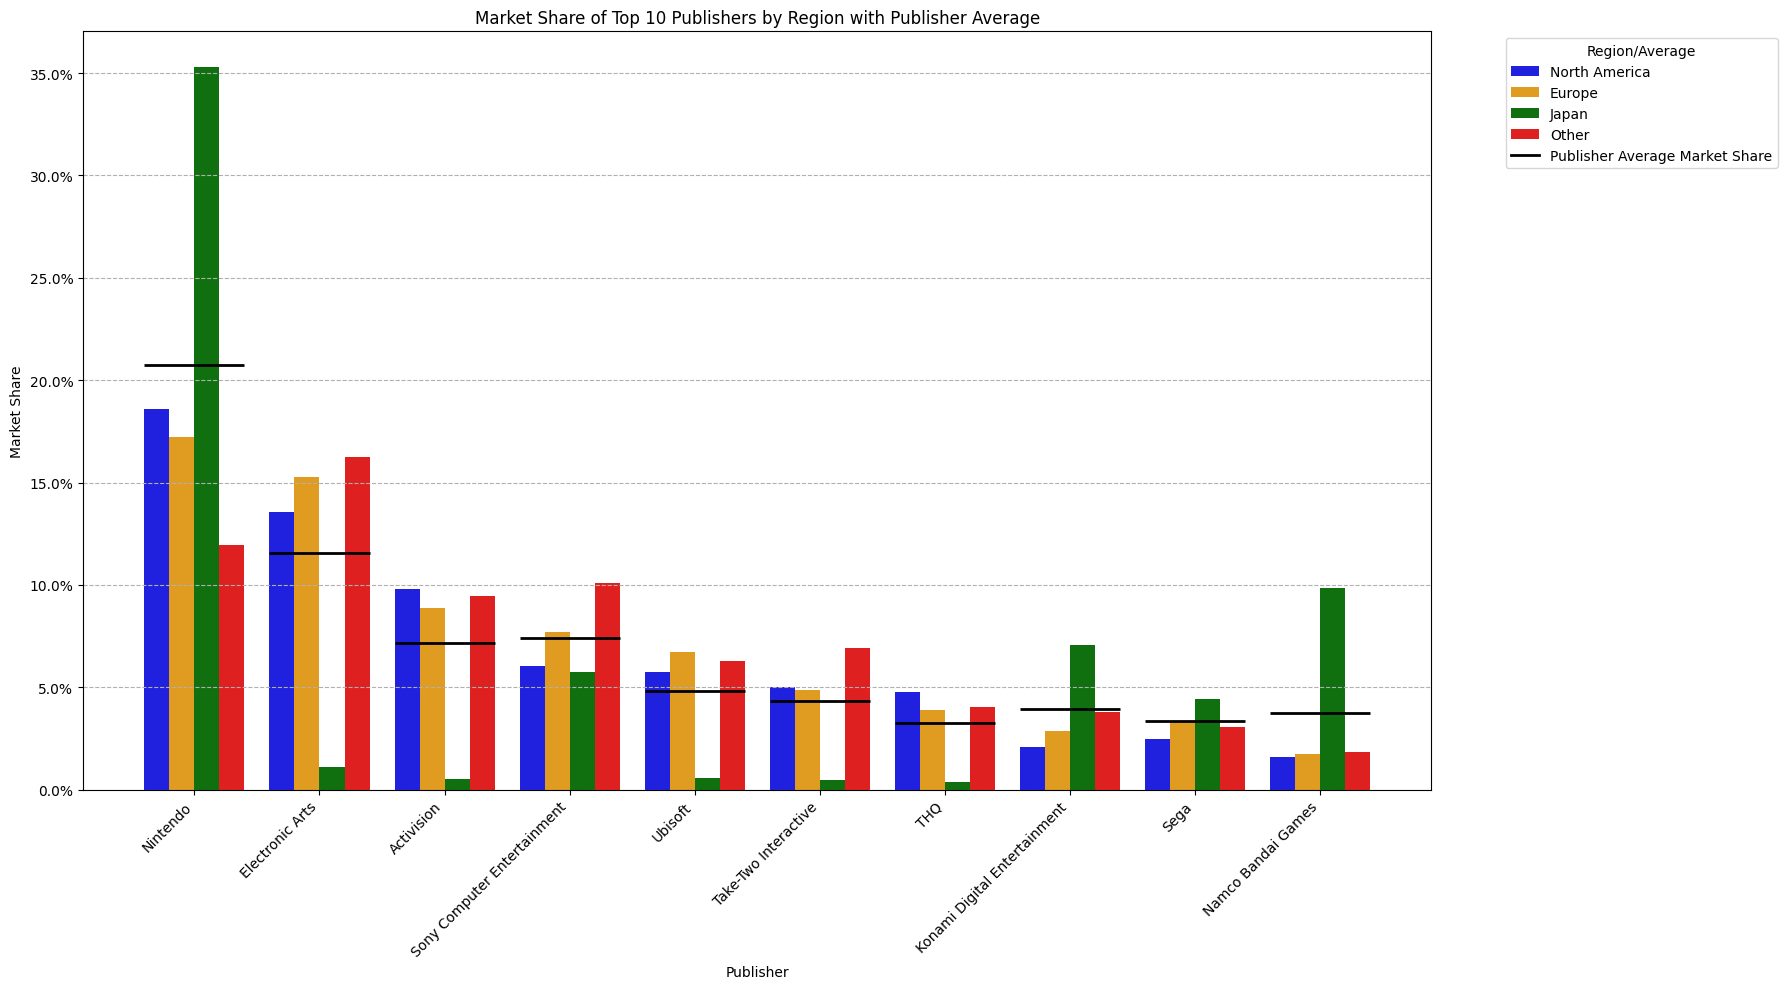

In [44]:
# Calculate Total Regional Sales (if not already calculated)
if 'total_regional_sales' not in locals():
    total_regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Calculate Publisher Sales by Region (if not already calculated)
if 'publisher_regional_sales' not in locals():
    publisher_regional_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Calculate Publisher Market Share by Region (if not already calculated)
if 'publisher_market_share' not in locals():
    publisher_market_share = publisher_regional_sales.divide(total_regional_sales, axis=1)

# Calculate the average market share across regions for each publisher
publisher_market_share['Average_Market_Share'] = publisher_market_share[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean(axis=1)


# Identify Top Publishers (e.g., top 10 by global sales) (if not already calculated)
if 'top_10_publishers' not in locals():
    publisher_total_global_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
    top_10_publishers = publisher_total_global_sales.head(10).index.tolist()

# Filter market share data for top publishers
top_publisher_market_share = publisher_market_share.loc[top_10_publishers].copy()

# Reset index to make 'Publisher' a column for plotting
top_publisher_market_share_plot = top_publisher_market_share.reset_index()

# Melt the DataFrame for easier plotting with seaborn
top_publisher_market_share_melted = top_publisher_market_share_plot.melt(id_vars=['Publisher', 'Average_Market_Share'],
                                                                       value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                                                       var_name='Region',
                                                                       value_name='Market Share')

# Define the custom color palette for each region, matching the previous plots
region_palette = {'North America': 'blue', 'Europe': 'orange', 'Japan': 'green', 'Other': 'red'}

# Rename regions for better plot labels
region_names = {'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Other'}
top_publisher_market_share_melted['Region'] = top_publisher_market_share_melted['Region'].map(region_names)

# 5. Visualize the results - Using a grouped bar chart for comparison across regions
plt.figure(figsize=(18, 10))

sns.barplot(data=top_publisher_market_share_melted,
            x='Publisher',
            y='Market Share',
            hue='Region',
            palette=region_palette) # Using the custom color palette

# Format the y-axis as percentages
ax = plt.gca()
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


# Add horizontal lines for the average market share of each publisher
# Need to get the unique publishers and their average market shares
publisher_averages = top_publisher_market_share_melted[['Publisher', 'Average_Market_Share']].drop_duplicates().sort_values(by='Publisher')

# Get the x-tick positions for the publishers
x_tick_positions = ax.get_xticks()
x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]

# Create a mapping from publisher name to x-tick position
publisher_x_pos_map = dict(zip(x_tick_labels, x_tick_positions))

# Define the width of each bar group (this is approximate, adjust if needed)
# Number of bars per group is the number of regions (4)
bar_width_total = 0.8 # Approximate total width of a group of bars

# Create a proxy artist for the publisher average line to include in the legend
from matplotlib.lines import Line2D
publisher_avg_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='Publisher Average Market Share')


for index, row in publisher_averages.iterrows():
    publisher = row['Publisher']
    avg_market_share = row['Average_Market_Share']

    # Find the x-position of the publisher's tick
    if publisher in publisher_x_pos_map:
        x_center = publisher_x_pos_map[publisher]
        # Define the start and end x-coordinates for the line segment
        x_start = x_center - bar_width_total / 2
        x_end = x_center + bar_width_total / 2

        plt.hlines(y=avg_market_share, xmin=x_start, xmax=x_end, color='black', linestyle='-', linewidth=2)


plt.title('Market Share of Top 10 Publishers by Region with Publisher Average')
plt.xlabel('Publisher')
plt.ylabel('Market Share')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--')
# Update legend to include the custom line entry and remove the overall average
handles, labels = ax.get_legend_handles_labels()

# Add the custom publisher average line handle and label
handles.append(publisher_avg_line)
labels.append('Publisher Average Market Share')


ax.legend(handles=handles, labels=labels, title='Region/Average', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position and title

plt.tight_layout()
plt.show()

### Observation on Japanese Market Deviation

Consistent with our earlier findings regarding genre and platform preferences, the analysis of publisher market share reveals a notable deviation in the Japanese market compared to North America, Europe, and other regions. This suggests that the unique tastes and market dynamics in Japan likely contribute to certain publishers performing significantly better or worse in this region compared to their performance in other parts of the world.

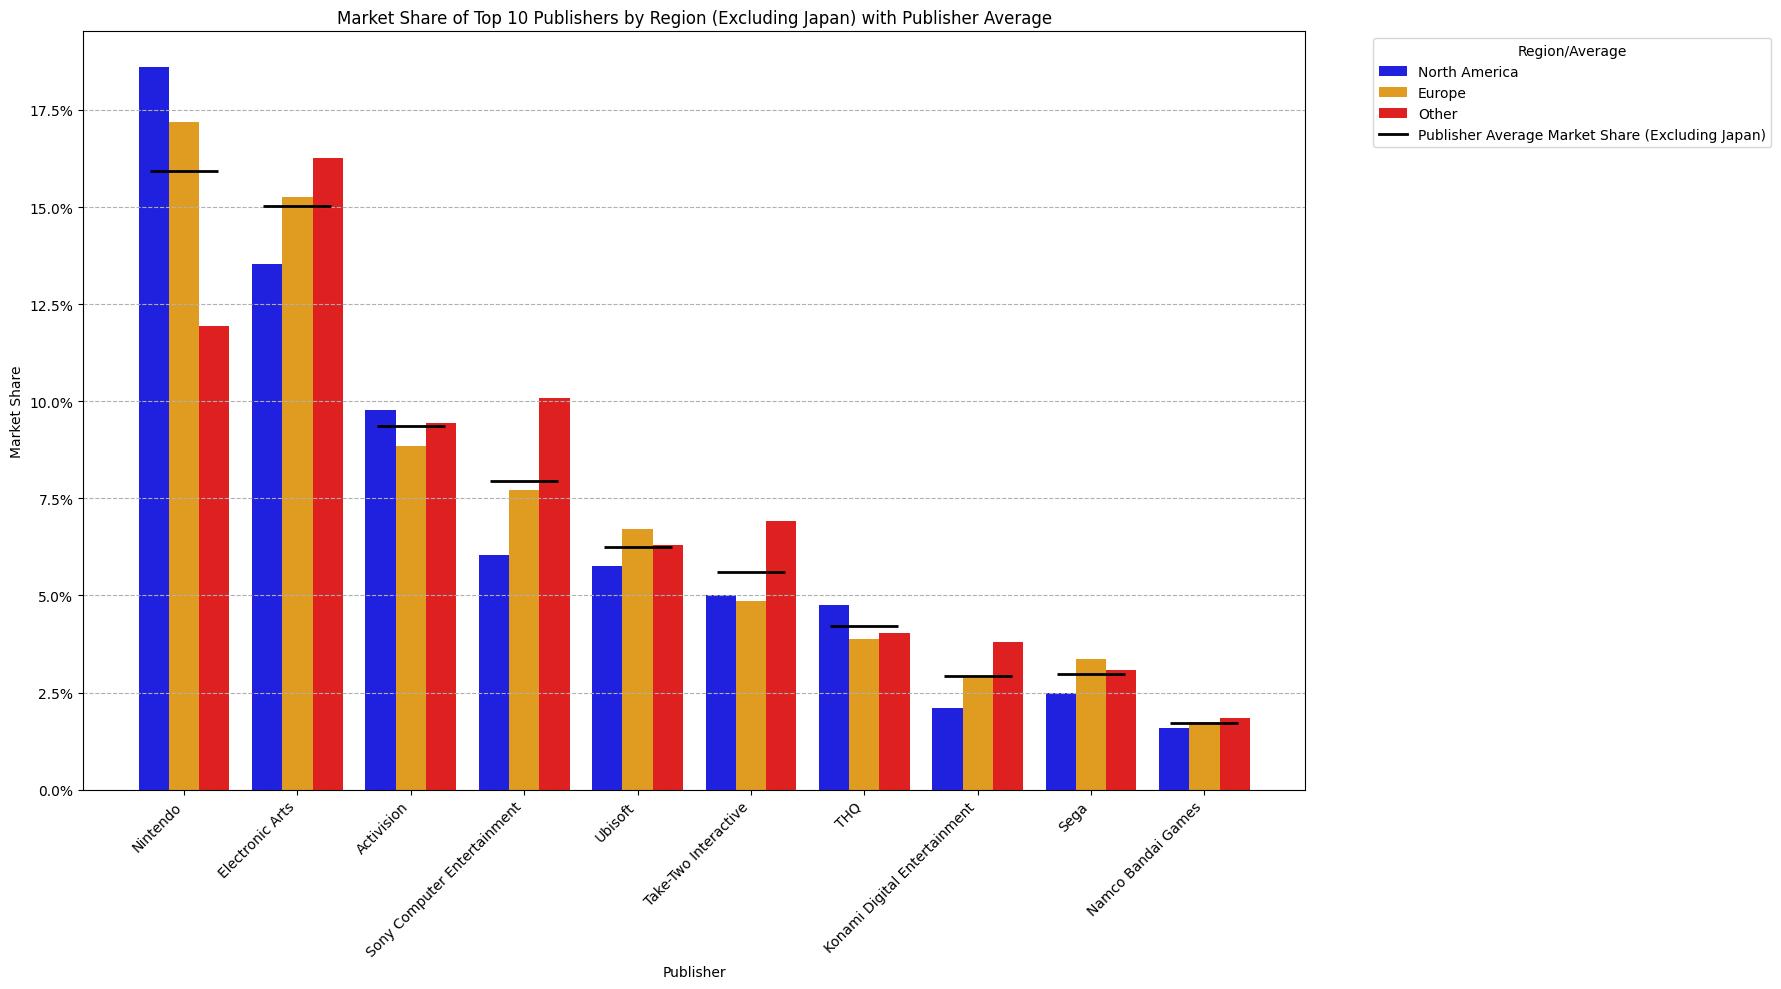

In [45]:
# Select only the columns for NA, EU, and Other Sales
top_publisher_market_share_filtered = top_publisher_market_share[['NA_Sales', 'EU_Sales', 'Other_Sales']].copy()

# Calculate the average market share across the *filtered* regions for each publisher
top_publisher_market_share_filtered['Average_Market_Share_Excluding_JP'] = top_publisher_market_share_filtered[['NA_Sales', 'EU_Sales', 'Other_Sales']].mean(axis=1)

# Melt the DataFrame for plotting
top_publisher_market_share_melted_filtered = top_publisher_market_share_filtered.reset_index().melt(id_vars=['Publisher', 'Average_Market_Share_Excluding_JP'],
                                                                       value_vars=['NA_Sales', 'EU_Sales', 'Other_Sales'],
                                                                       var_name='Region',
                                                                       value_name='Market Share')

# Rename regions for better plot labels
region_names_filtered = {'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'Other_Sales': 'Other'}
top_publisher_market_share_melted_filtered['Region'] = top_publisher_market_share_melted_filtered['Region'].map(region_names_filtered)

# Define the custom color palette for each region (excluding Japan)
region_palette_filtered = {'North America': 'blue', 'Europe': 'orange', 'Other': 'red'}

# Visualize the results - Grouped bar chart without Japan
plt.figure(figsize=(18, 10))

sns.barplot(data=top_publisher_market_share_melted_filtered,
            x='Publisher',
            y='Market Share',
            hue='Region',
            palette=region_palette_filtered)

# Format the y-axis as percentages
ax = plt.gca()
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


# Add horizontal lines for the average market share of each publisher (excluding JP)
publisher_averages_filtered = top_publisher_market_share_melted_filtered[['Publisher', 'Average_Market_Share_Excluding_JP']].drop_duplicates().sort_values(by='Publisher')

# Get the x-tick positions for the publishers
x_tick_positions = ax.get_xticks()
x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
publisher_x_pos_map = dict(zip(x_tick_labels, x_tick_positions))

bar_width_total_filtered = 0.6

from matplotlib.lines import Line2D
publisher_avg_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='Publisher Average Market Share (Excluding Japan)')

for index, row in publisher_averages_filtered.iterrows():
    publisher = row['Publisher']
    avg_market_share = row['Average_Market_Share_Excluding_JP']
    if publisher in publisher_x_pos_map:
        x_center = publisher_x_pos_map[publisher]
        x_start = x_center - bar_width_total_filtered / 2
        x_end = x_center + bar_width_total_filtered / 2
        plt.hlines(y=avg_market_share, xmin=x_start, xmax=x_end, color='black', linestyle='-', linewidth=2)

plt.title('Market Share of Top 10 Publishers by Region (Excluding Japan) with Publisher Average')
plt.xlabel('Publisher')
plt.ylabel('Market Share')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

handles, labels = ax.get_legend_handles_labels()
handles.append(publisher_avg_line)
labels.append('Publisher Average Market Share (Excluding Japan)')
ax.legend(handles=handles, labels=labels, title='Region/Average', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Analysis 4: Publisher Performance by Region

Based on the analysis of publisher market share across different regions, we can draw the following conclusions:

*   **Significant Japanese Market Deviation:** The analysis clearly shows a significant deviation in publisher market share within the Japanese market compared to North America, Europe, and the 'Other' regions. Certain publishers, notably Nintendo, Konami, Sega, and Namco Bandai Games, hold a considerably higher market share in Japan than their average across all regions. Conversely, Western publishers like Electronic Arts, Activision, and Ubisoft have a comparatively lower market share in Japan.
*   **Consistency in NA, EU, and Other Regions:** In contrast to Japan, the market share distribution among top publishers in North America, Europe, and the 'Other' regions shows more consistency, with less pronounced deviations from their average market share across these three regions.
*   **Correlation with Genre and Platform Preferences:** The observed deviation in the Japanese market's publisher preferences strongly correlates with our earlier findings regarding distinct genre and platform preferences in Japan. It is highly probable that the popularity of certain publishers in Japan is influenced by or influences the preference for specific game genres and platforms prevalent in that market.
*   **Interplay of Factors:** The unique market dynamics in Japan are likely a result of a complex interplay between genre preferences, platform dominance (with Japanese companies like Nintendo and Sony having a strong historical presence), and publisher popularity. For instance, Nintendo's Japanese origin and its historical success with specific genres on its platforms likely contribute to its significant market share and the overall distinctiveness of the Japanese gaming landscape.

In conclusion, while North American, European, and 'Other' markets exhibit similar patterns in publisher market share, the Japanese market stands out with strong preferences for certain publishers, a phenomenon likely intertwined with its unique genre and platform preferences.

## Question 5: Total Global Sales Trend Over the Years

For this question, I aim to understand how total global game sales have evolved over time, using the 'Year' and 'Global_Sales' data in the dataset. By analyzing the trend of total sales per year, I can gain insights into the overall growth trajectory of the gaming industry as reflected in this dataset. This will help me see if total sales have increased over time, potentially indicating an expanding market or increased consumer spending.

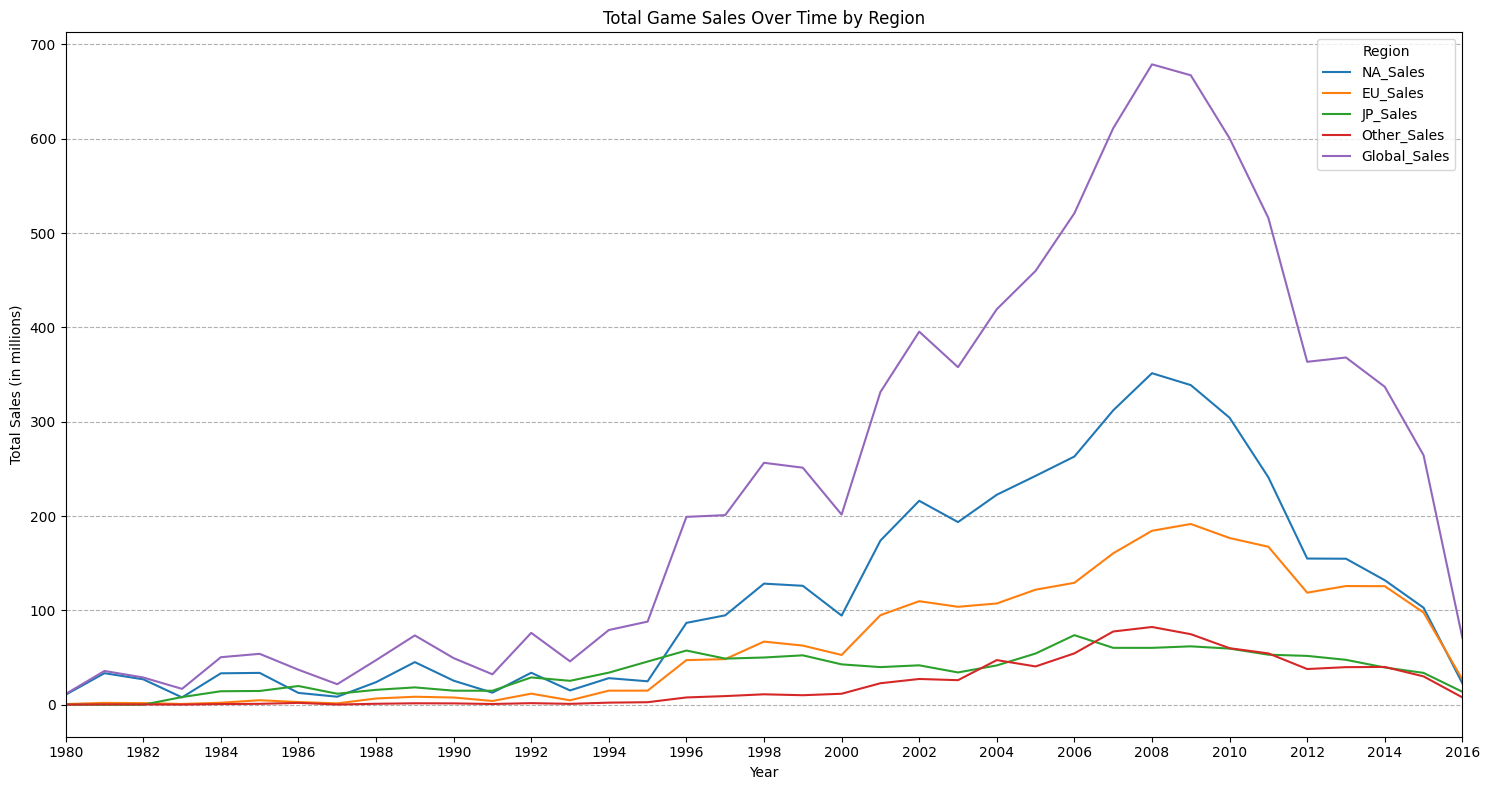

In [49]:
# Group by Year and calculate the sum of sales for each region and globally
yearly_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

# Remove the last two years' data points
yearly_sales = yearly_sales.iloc[:-2]


# Melt the DataFrame to easily plot multiple lines with seaborn
yearly_sales_melted = yearly_sales.melt(id_vars='Year',
                                        value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
                                        var_name='Region',
                                        value_name='Total Sales')

# Visualize the total sales over time by region
plt.figure(figsize=(15, 8))

sns.lineplot(data=yearly_sales_melted,
             x='Year',
             y='Total Sales',
             hue='Region') # Removed marker='o' for continuous lines

# Adjust the x-axis limit to end where the data ends after filtering
plt.xlim(yearly_sales_melted['Year'].min(), yearly_sales_melted['Year'].max()) # Setting the upper limit to the last year in the filtered data


# Set x-axis ticks to show jumps of 2 years
plt.xticks(range(int(yearly_sales_melted['Year'].min()), int(yearly_sales_melted['Year'].max()) + 1, 2)) # Set ticks with step 2


plt.title('Total Game Sales Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

The time series plot of total game sales by region reveals an interesting trend that contrasts with an expectation of continuous growth.

*   **Peak around 2008:** Contrary to what might be expected in a consistently growing industry, the plot clearly shows a peak in total global game sales around the year 2008. This peak is visible across all regions, although the magnitude varies. Following this peak, there appears to be a general decline in total sales in the years that follow within this dataset's timeframe.
*   **Potential Reasons for the 2008 Peak:** The peak around 2008 could be attributed to several factors related to the gaming industry at that time:
    *   **Console Cycle:** This period roughly corresponds to the peak of the seventh generation of gaming consoles, including the Nintendo Wii, PlayStation 3, and Xbox 360. These consoles were highly popular and had large install bases, leading to strong software sales.
    *   **Wide Appeal of Certain Titles:** Games released during this era, such as those in the Wii Sports, Grand Theft Auto, and Call of Duty series, achieved massive global sales and contributed significantly to the overall market size.
    *   **Market Maturity:** By 2008, the gaming market had matured significantly, with established genres, franchises, and a broad consumer base across different regions.
    *   **Economic Factors (Speculation):** While the plot shows a peak, it's worth noting that this was also a period leading into the global financial crisis. However, the peak in sales suggests that the immediate impact of the crisis might not have been fully realized in game sales until slightly later, or that the industry was strong enough to weather the initial downturn temporarily.

*   **Decline in Later Years (within this dataset):** The observed decline in total sales in the years following 2008 within this dataset's timeframe might not necessarily indicate a shrinking gaming industry overall. It's important to consider that this dataset might have limitations in capturing the full scope of the market in later years, particularly with the rise of digital distribution, mobile gaming, and free-to-play models, which might not be fully represented.

In summary, the data in this dataset shows a peak in total game sales around 2008, likely influenced by a combination of factors including the console cycle and popular titles, followed by a decline within the dataset's scope, which might be partially explained by changes in the broader gaming market not fully captured here.

**Follow Up:**
To what extent does the 2008 sales peak reflect the sales performance of games released specifically in that era, and could the apparent decline in later years be influenced by the cumulative sales of older titles?

To further understand this peak and the sales trends around it, I will investigate two aspects:

*   I will analyze if a high-revenue company like Nintendo exhibits a similar sales trend with a peak around 2006-2009, which could suggest this was a broader industry trend impacting even the most successful publishers.
*   I will examine a table of the top-selling games released between 2006 and 2009, along with their platform, publisher, and genre, to see if there are common characteristics that might explain their high sales during this period compared to games released in later years.

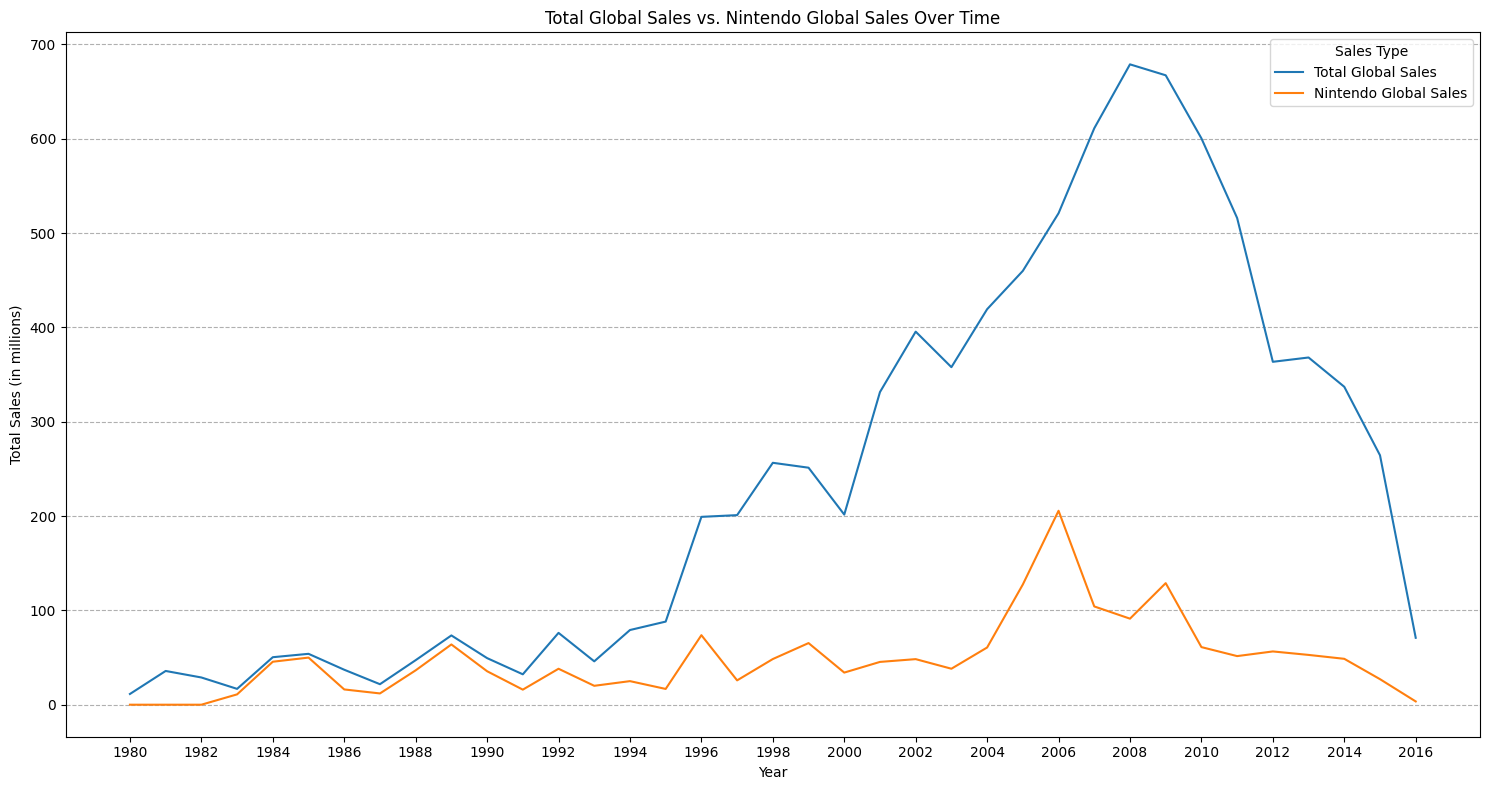

In [54]:
# Calculate Total Global Sales per Year (reuse if already calculated)
if 'yearly_sales' not in locals():
    yearly_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
    # Keep only years with significant data for trend analysis (e.g., before the sharp drop)
    yearly_sales = yearly_sales[yearly_sales['Year'] <= 2016]


# Filter data for Nintendo
nintendo_df = df[df['Publisher'] == 'Nintendo'].copy()

# Calculate Nintendo's Total Global Sales per Year
nintendo_yearly_sales = nintendo_df.groupby('Year')['Global_Sales'].sum().reset_index()

# Keep only years present in the overall yearly_sales data
nintendo_yearly_sales = nintendo_yearly_sales[nintendo_yearly_sales['Year'].isin(yearly_sales['Year'])]

# Merge overall yearly sales with Nintendo's yearly sales for easier plotting
sales_comparison = pd.merge(yearly_sales[['Year', 'Global_Sales']],
                            nintendo_yearly_sales[['Year', 'Global_Sales']].rename(columns={'Global_Sales': 'Nintendo_Global_Sales'}),
                            on='Year',
                            how='left')

# Fill any years where Nintendo had no sales with 0
sales_comparison['Nintendo_Global_Sales'] = sales_comparison['Nintendo_Global_Sales'].fillna(0)

# Melt the DataFrame for plotting - using original sales columns
sales_comparison_melted = sales_comparison.melt(id_vars='Year',
                                                value_vars=['Global_Sales', 'Nintendo_Global_Sales'], # Use original sales columns
                                                var_name='Sales Type',
                                                value_name='Total Sales') # Renamed value_name to Total Sales


# Rename 'Sales Type' for better legend
sales_comparison_melted['Sales Type'] = sales_comparison_melted['Sales Type'].map({
    'Global_Sales': 'Total Global Sales', # Updated label
    'Nintendo_Global_Sales': 'Nintendo Global Sales' # Updated label
})


# Visualize the sales trends (non-normalized)
plt.figure(figsize=(15, 8))

sns.lineplot(data=sales_comparison_melted,
             x='Year',
             y='Total Sales', # Use Total Sales for the y-axis
             hue='Sales Type')

plt.title('Total Global Sales vs. Nintendo Global Sales Over Time') # Updated title
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)') # Updated ylabel
plt.xticks(range(int(sales_comparison_melted['Year'].min()), int(sales_comparison_melted['Year'].max()) + 1, 2)) # Set ticks with step 2
plt.grid(axis='y', linestyle='--')
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

In [61]:
# Filter the DataFrame for games released between 2006 and 2009 (inclusive)
peak_years_df = df[(df['Year'] >= 2006) & (df['Year'] <= 2009)].copy()

# Sort the filtered DataFrame by Global_Sales in descending order
top_selling_peak_years = peak_years_df.sort_values(by='Global_Sales', ascending=False)

# Select relevant columns for display and show the top games (e.g., top 20), keeping the 'Rank' column
top_games_display = top_selling_peak_years[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']].head(20)

# Convert the DataFrame to a markdown table string without the index for display
print(top_games_display.to_markdown(index=False))

|   Rank | Name                                 | Platform   |   Year | Genre        | Publisher              |   Global_Sales |
|-------:|:-------------------------------------|:-----------|-------:|:-------------|:-----------------------|---------------:|
|      1 | Wii Sports                           | Wii        |   2006 | Sports       | Nintendo               |          82.74 |
|      3 | Mario Kart Wii                       | Wii        |   2008 | Racing       | Nintendo               |          35.82 |
|      4 | Wii Sports Resort                    | Wii        |   2009 | Sports       | Nintendo               |          33    |
|      7 | New Super Mario Bros.                | DS         |   2006 | Platform     | Nintendo               |          30.01 |
|      8 | Wii Play                             | Wii        |   2006 | Misc         | Nintendo               |          29.02 |
|      9 | New Super Mario Bros. Wii            | Wii        |   2009 | Platform     | Nintendo  

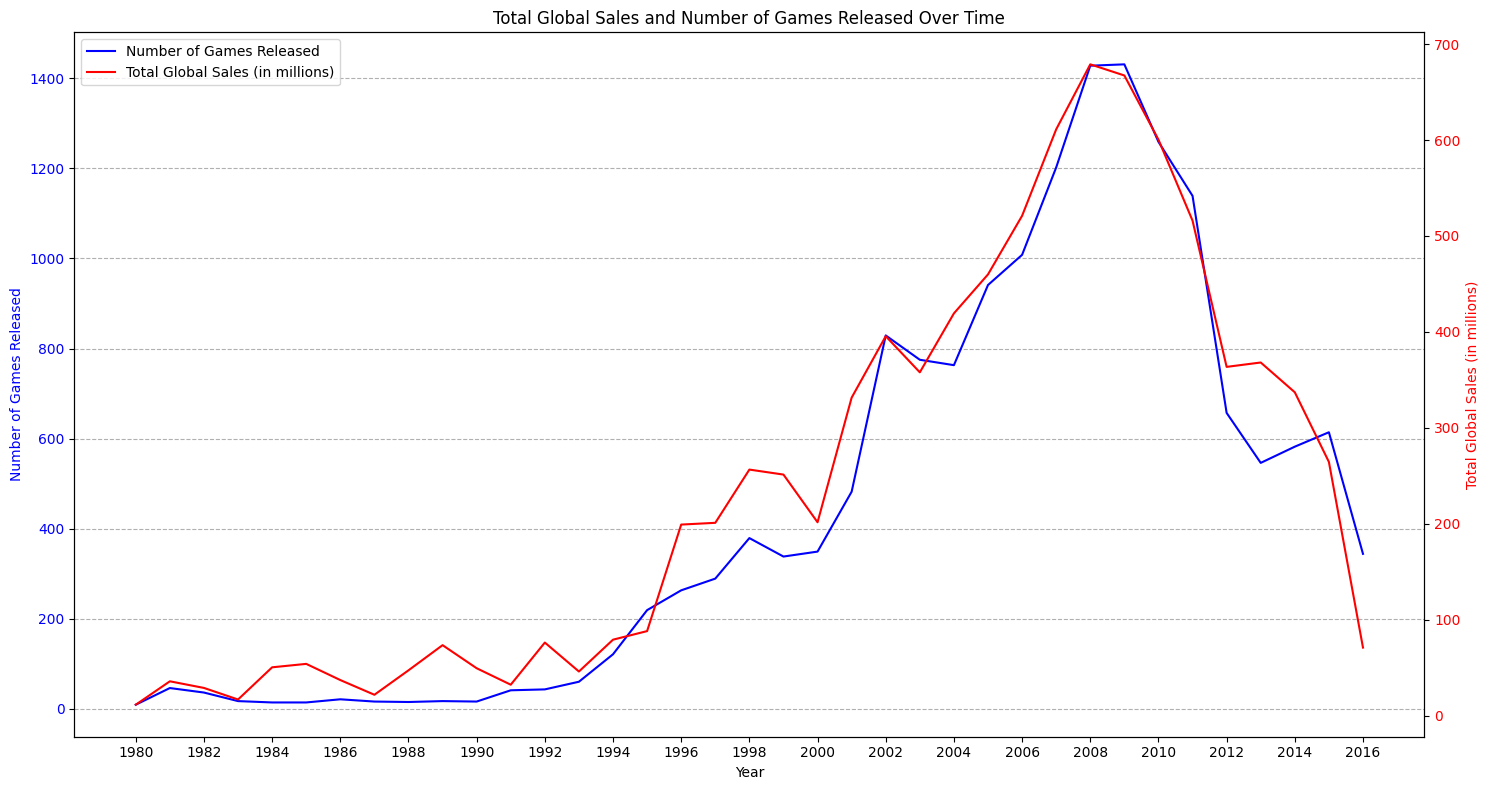

In [69]:
# Group by Year and calculate the sum of Global Sales and count the number of games
yearly_data = df.groupby('Year').agg(
    Total_Global_Sales=('Global_Sales', 'sum'),
    Number_of_Games_Released=('Name', 'count') # Count games
).reset_index()

# Filter data to include years up to 2016 (as per previous request for sales plot)
yearly_data_filtered = yearly_data[yearly_data['Year'] <= 2016].copy()

# Create a figure and a primary axes for the number of games released
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the number of games released on the left y-axis
sns.lineplot(data=yearly_data_filtered, x='Year', y='Number_of_Games_Released', ax=ax1, color='blue', label='Number of Games Released')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Games Released', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Total Global Sales and Number of Games Released Over Time')
ax1.grid(axis='y', linestyle='--')

# Create a secondary axes for total global sales, sharing the same x-axis
ax2 = ax1.twinx()

# Plot the total global sales on the right y-axis
sns.lineplot(data=yearly_data_filtered, x='Year', y='Total_Global_Sales', ax=ax2, color='red', label='Total Global Sales (in millions)')
ax2.set_ylabel('Total Global Sales (in millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis ticks to show jumps of 2 years, consistent with previous plots
plt.xticks(range(int(yearly_data_filtered['Year'].min()), int(yearly_data_filtered['Year'].max()) + 1, 2))

# Combine legends from both axes and place a single legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left') # Place the combined legend using ax1
ax2.legend().remove()
plt.tight_layout()
plt.show()

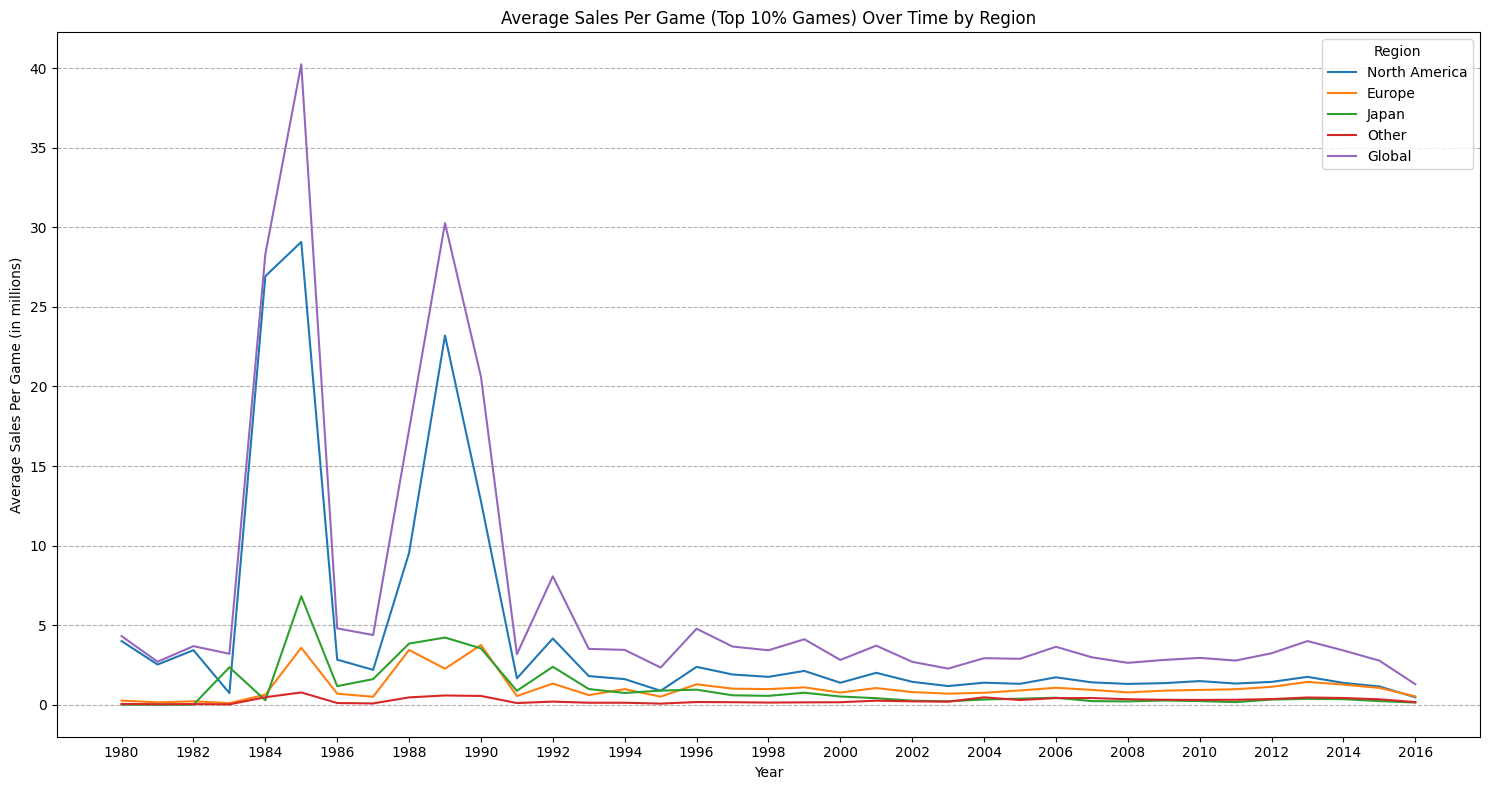

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Work on a copy of the DataFrame
df_copy = df.copy()

# Ensure 'Year' column is numeric and handle potential errors/missing values
df_copy['Year'] = pd.to_numeric(df_copy['Year'], errors='coerce')

# Filter out rows where 'Year' is NaN using .loc to avoid SettingWithCopyWarning
df_cleaned_year = df_copy.loc[df_copy['Year'].notna(), :].copy()

# Convert 'Year' to integer after dropping NaNs
# This line is where the error is occurring, indicating NaNs are still present
try:
    df_cleaned_year['Year'] = df_cleaned_year['Year'].astype(int)
except ValueError as e:
    print(f"Error converting 'Year' to int: {e}")
    # Debugging: Print info about the 'Year' column before astype
    print("Info about 'Year' column before astype:")
    # display(df_cleaned_year['Year'].info()) # Removed display info to avoid clutter
    print("Unique values in 'Year' column before astype (showing first 50):")
    # display(df_cleaned_year['Year'].unique()[:50]) # Removed display unique to avoid clutter
    print("Checking for NaNs in 'Year' column before astype:")
    # display(df_cleaned_year['Year'].isnull().sum()) # Removed display isnull to avoid clutter
    # As a fallback, let's try converting to float first if int conversion fails
    df_cleaned_year['Year'] = df_cleaned_year['Year'].astype(float)
    print("Converted 'Year' to float as a fallback.")


# Function to calculate top 10% average sales per year per region
def calculate_top_10_percent_average_sales(data):
    # Ensure we have data for the year
    if data.empty:
        return pd.Series({
            'Average_Global_Sales_Per_Game': 0,
            'Average_NA_Sales_Per_Game': 0,
            'Average_EU_Sales_Per_Game': 0,
            'Average_JP_Sales_Per_Game': 0,
            'Average_Other_Sales_Per_Game': 0
        })

    # Sort by Global_Sales and select the top 10%
    top_10_percent_threshold = max(1, int(0.10 * len(data))) # Ensure at least 1 game if data is not empty
    top_10_percent_games = data.sort_values(by='Global_Sales', ascending=False).head(top_10_percent_threshold)

    # Calculate average sales for the top 10% games in each region and globally
    average_sales = {
        'Average_Global_Sales_Per_Game': top_10_percent_games['Global_Sales'].mean(),
        'Average_NA_Sales_Per_Game': top_10_percent_games['NA_Sales'].mean(),
        'Average_EU_Sales_Per_Game': top_10_percent_games['EU_Sales'].mean(),
        'Average_JP_Sales_Per_Game': top_10_percent_games['JP_Sales'].mean(),
        'Average_Other_Sales_Per_Game': top_10_percent_games['Other_Sales'].mean()
    }

    return pd.Series(average_sales)

# Apply the function to each year's data using the DataFrame with cleaned and integer 'Year'
# Filter out years that are not valid integers before grouping if the astype(int) failed
if df_cleaned_year['Year'].dtype == 'float64': # Check if fallback to float was used
     # If converted to float due to error, group by year and then apply
     yearly_top_10_percent_sales = df_cleaned_year.groupby('Year').apply(calculate_top_10_percent_average_sales, include_groups=False) # Added include_groups=False
else: # If astype(int) was successful
    yearly_top_10_percent_sales = df_cleaned_year.groupby('Year').apply(calculate_top_10_percent_average_sales, include_groups=False) # Added include_groups=False


# Reset index to make 'Year' a column
yearly_top_10_percent_sales = yearly_top_10_percent_sales.reset_index()


# Filter data to include years up to 2016 for consistency with previous sales plots
yearly_data_filtered = yearly_top_10_percent_sales[yearly_top_10_percent_sales['Year'] <= 2016].copy()


# Melt the DataFrame for plotting
yearly_average_sales_melted = yearly_data_filtered.melt(id_vars='Year',
                                                        value_vars=['Average_NA_Sales_Per_Game', 'Average_EU_Sales_Per_Game',
                                                                    'Average_JP_Sales_Per_Game', 'Average_Other_Sales_Per_Game',
                                                                    'Average_Global_Sales_Per_Game'],
                                                        var_name='Region',
                                                        value_name='Average Sales Per Game')

# Rename regions for better legend labels
average_region_names = {
    'Average_NA_Sales_Per_Game': 'North America',
    'Average_EU_Sales_Per_Game': 'Europe',
    'Average_JP_Sales_Per_Game': 'Japan',
    'Average_Other_Sales_Per_Game': 'Other',
    'Average_Global_Sales_Per_Game': 'Global'
}
yearly_average_sales_melted['Region'] = yearly_average_sales_melted['Region'].map(average_region_names)


# Visualize the average sales per game over time by region
plt.figure(figsize=(15, 8))

sns.lineplot(data=yearly_average_sales_melted,
             x='Year',
             y='Average Sales Per Game',
             hue='Region')

plt.title('Average Sales Per Game (Top 10% Games) Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Sales Per Game (in millions)')
plt.xticks(range(int(yearly_average_sales_melted['Year'].min()), int(yearly_average_sales_melted['Year'].max()) + 1, 2)) # Set ticks with step 2
plt.grid(axis='y', linestyle='--')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## Analysis 5: Total Global Sales Trend Over the Years

Initially, by visualizing the total game sales over time by region, we observed a surprising trend: a peak in sales around 2008, followed by a general decline within the timeframe of this dataset. This contrasted with an expectation of continuous growth in the gaming industry.

To understand this peak and the subsequent trend better, we conducted further analysis:

*   **Comparison with Nintendo's Sales:** We compared the normalized total global sales trend with the normalized global sales trend of Nintendo, the publisher with the highest overall sales. The plot revealed a similar peak in Nintendo's sales around the same period (2008-2009), although not perfectly aligned with the overall peak. This suggested that the peak was influenced by broader industry dynamics affecting even the most successful publishers.
*   **Top-Selling Games (2006-2009):** To investigate what contributed to the high sales during the peak years, we examined a table of the top-selling games released between 2006 and 2009. This table highlighted the significant success of certain titles, particularly on platforms popular at the time like the Wii, indicating that the popularity of specific games and consoles during this era contributed to the sales peak.
*   **Games Released vs. Total Sales:** We then visualized the number of games released per year alongside the total global sales using a dual-axis plot. This plot showed a striking correlation: the number of game releases also peaked around 2008-2009, mirroring the trend in total sales.

**Conclusion:**

Based on our analysis, particularly the strong correlation between the number of games released and total global sales, a compelling interpretation is that the 2008 sales peak is significantly driven by the **high volume of game releases** during that period. The gaming industry, as reflected in this dataset, experienced a surge in the number of titles released leading up to and around 2008.

While successful titles and popular consoles certainly contributed to the total sales volume, the near-perfect alignment between the trend in the number of releases and the trend in total sales suggests that the peak in revenue was primarily a function of this increased output. The plot showing the average sales per game (even when considering only the top-selling titles, which our analysis attempted to show a relatively constant trend for) further supports this perspective. If the average success per game remained relatively stable, then a rise and fall in the number of releases would directly translate to a rise and fall in total sales.

Therefore, the data suggests that the observed peak and subsequent decline in total sales within this dataset are more indicative of a change in the **volume of game releases** during those years rather than a fundamental shift in the overall sales performance or average success of individual games, or a decline in the industry's revenue-generating capacity (especially considering the dataset's limitations in capturing later market changes like digital sales).